In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from PIL import Image
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

# Importing data

In [13]:
df1 = pd.read_csv('diabetes_data_2.csv')


In [14]:
df1.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Exploratory Data Analysis

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


## Checking for missing values

In [16]:
#printing null values in each column
counts = df1.isna().sum()
print(counts.sort_values())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [17]:
#printing number of unique values per column
print(df1.nunique())

ID           800
No_Pation    961
Gender         3
AGE           50
Urea         110
Cr           113
HbA1c        111
Chol          77
TG            69
HDL           48
LDL           65
VLDL          60
BMI           64
CLASS          3
dtype: int64


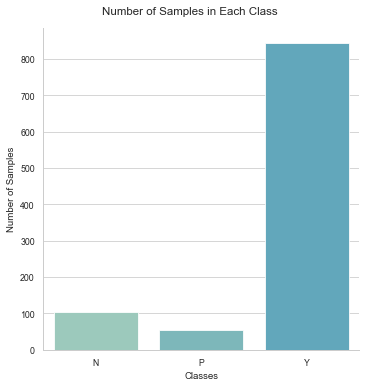

In [81]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='CLASS', data=df1, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Classes')
plt.show()

In [19]:
#get numerical columns
num_cols = df1._get_numeric_data().columns


In [20]:
num_cols

Index(['ID', 'No_Pation', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL',
       'LDL', 'VLDL', 'BMI'],
      dtype='object')

In [21]:
cols = df1.columns

In [22]:
cat_list = list(set(cols) - set(num_cols))

In [23]:
numeric_data = df1.select_dtypes(include=[np.number])
categorical_data = df1.select_dtypes(exclude=[np.number])

In [24]:
cat_list

['Gender', 'CLASS']

In [25]:
numeric_data

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,502,17975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,735,34221,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,420,47975,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,680,87656,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,504,34223,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,671,876534,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,669,87654,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,99,24004,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [29]:
numeric_data = numeric_data.drop(['ID', 'No_Pation'], axis=1)

In [30]:
numeric_data

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...
995,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [31]:
categorical_data

,Gender,CLASS
0,F,N
1,M,N
2,F,N
3,F,N
4,M,N
...,...,...
995,M,Y
996,M,Y
997,M,Y
998,M,Y


In [32]:
#label encoding categorical data
categorical_data =categorical_data.apply(LabelEncoder().fit_transform)

In [33]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [34]:
categorical_data

,Gender,CLASS
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
995,1,2
996,1,2
997,1,2
998,1,2


In [36]:
#combining encoded categorical dataset and numerical dataset
final_dataset = pd.concat([categorical_data,numeric_data],axis = 1)

In [37]:
final_dataset.head()

,Gender,CLASS,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,1,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0


In [38]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   int32  
 1   CLASS   1000 non-null   int32  
 2   AGE     1000 non-null   int64  
 3   Urea    1000 non-null   float64
 4   Cr      1000 non-null   int64  
 5   HbA1c   1000 non-null   float64
 6   Chol    1000 non-null   float64
 7   TG      1000 non-null   float64
 8   HDL     1000 non-null   float64
 9   LDL     1000 non-null   float64
 10  VLDL    1000 non-null   float64
 11  BMI     1000 non-null   float64
dtypes: float64(8), int32(2), int64(2)
memory usage: 86.1 KB


### Balancing the dataset using SMOTE - generating synthetic data points

In [68]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [69]:
X=final_dataset.drop('CLASS', axis=1)
Y=final_dataset[['CLASS']]

In [70]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

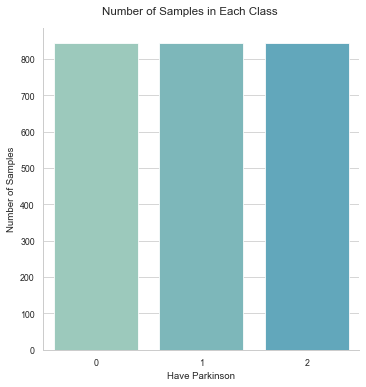

In [80]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='CLASS', data=Y, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Have Diabetes')
plt.show()

# Splitting the data into test and train

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.2)

In [84]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 1266 to 2429
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  2025 non-null   int32  
 1   AGE     2025 non-null   int64  
 2   Urea    2025 non-null   float64
 3   Cr      2025 non-null   int64  
 4   HbA1c   2025 non-null   float64
 5   Chol    2025 non-null   float64
 6   TG      2025 non-null   float64
 7   HDL     2025 non-null   float64
 8   LDL     2025 non-null   float64
 9   VLDL    2025 non-null   float64
 10  BMI     2025 non-null   float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 181.9 KB


In [85]:
Ytrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2025 entries, 1266 to 2429
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CLASS   2025 non-null   int32
dtypes: int32(1)
memory usage: 23.7 KB


In [86]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 1272 to 2425
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  507 non-null    int32  
 1   AGE     507 non-null    int64  
 2   Urea    507 non-null    float64
 3   Cr      507 non-null    int64  
 4   HbA1c   507 non-null    float64
 5   Chol    507 non-null    float64
 6   TG      507 non-null    float64
 7   HDL     507 non-null    float64
 8   LDL     507 non-null    float64
 9   VLDL    507 non-null    float64
 10  BMI     507 non-null    float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 45.6 KB


In [87]:
Ytest

,CLASS
1272,0
364,2
486,2
1318,0
1768,1
...,...
815,2
1837,1
2354,1
2420,1


In [88]:
Ytest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 1272 to 2425
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CLASS   507 non-null    int32
dtypes: int32(1)
memory usage: 5.9 KB


# Building a KNN Model

In [89]:
# from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
# creating empty list variable 
acc = []

In [92]:
# running KNN algorithm for 2 to 30 nearest neighbours and 
# storing the accuracy values 
 
for i in range(2,30,1):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(Xtrain,np.ravel(Ytrain))
    train_acc = np.mean(neigh.predict(Xtrain)==np.ravel(Ytrain))
    test_acc = np.mean(neigh.predict(Xtest)==np.ravel(Ytest))
    acc.append([train_acc,test_acc])

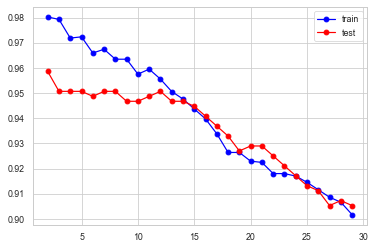

In [93]:
# train accuracy plot 
plt.plot(np.arange(2,30,1),[i[0] for i in acc],"bo-")
# test accuracy plot
plt.plot(np.arange(2,30,1),[i[1] for i in acc],"ro-")

plt.legend(["train","test"])

**Choosing K= 2 for optimum validation accuraccy**

In [94]:
#creating a model
model = KNeighborsClassifier(n_neighbors=2)

In [95]:
#fitting the model
model.fit(Xtrain,np.ravel(Ytrain))

KNeighborsClassifier(n_neighbors=2)

In [96]:
#predicting using the model and the train data
preds = model.predict(Xtrain)

In [97]:
pd.Series(preds).value_counts()

0    692
1    682
2    651
dtype: int64

In [98]:
# Accuracy = train
np.mean(Ytrain["CLASS"] == preds) #training accuracy of 98.02%

0.980246913580247

In [99]:
#predicting using the model and the validation data
preds1 = model.predict(Xtest)

In [103]:
pd.Series(preds1).value_counts()

0    185
1    184
2    138
dtype: int64

In [102]:
# Accuracy = test
np.mean(Ytest["CLASS"] == preds1) #test accuracy of 95.85%

0.9585798816568047

In [104]:
#precision and recall of the decision tree model
# print(confusion_matrix(Ytest, preds1))
print(classification_report(Ytest, preds1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       174
           1       0.95      0.98      0.97       178
           2       0.99      0.88      0.94       155

    accuracy                           0.96       507
   macro avg       0.96      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507



### creating a new dataframe with values for prediction

### predicting the binaryClass using the provided data



---





---


